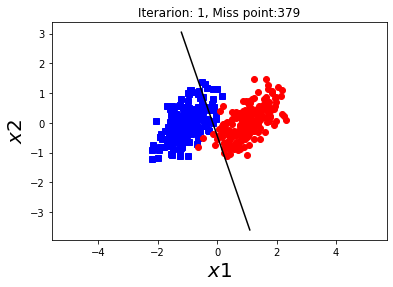

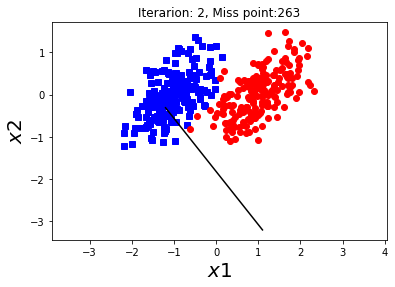

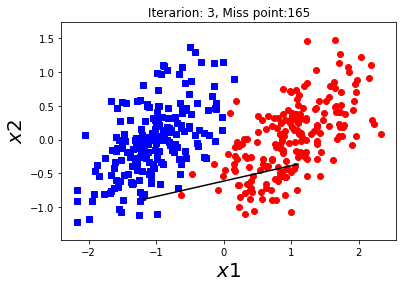

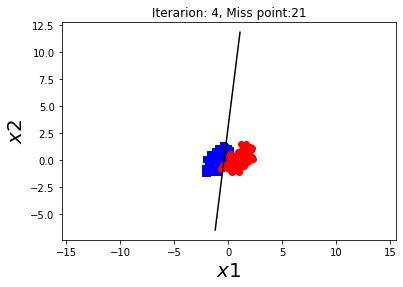

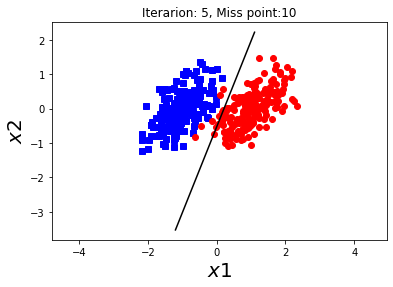

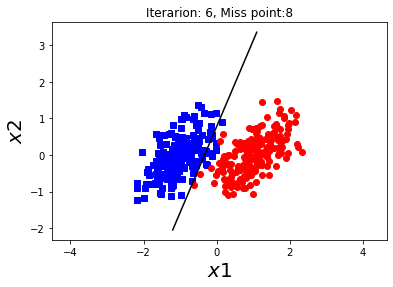

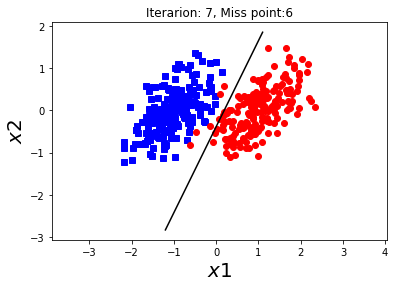

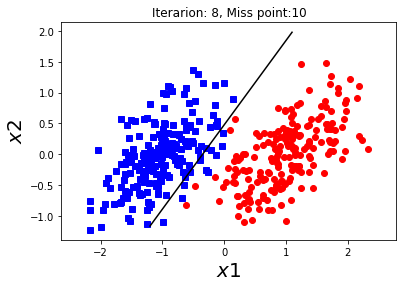

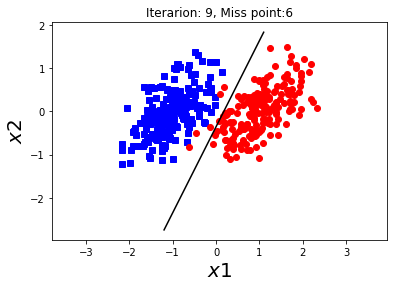

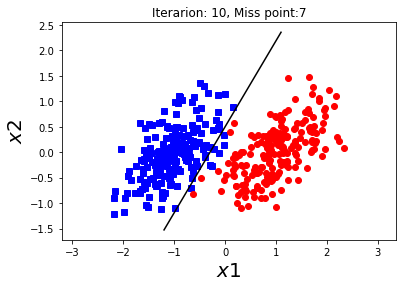

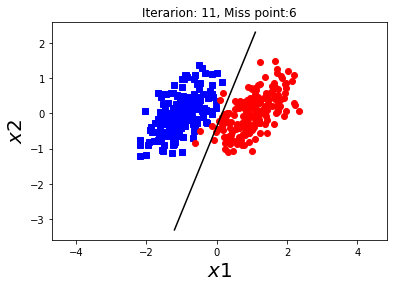

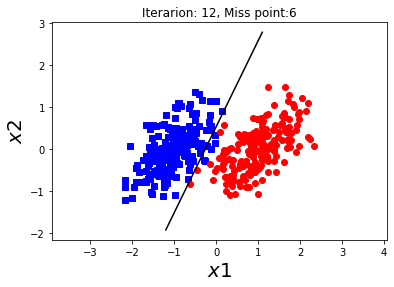

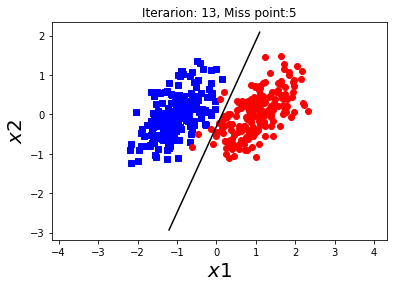

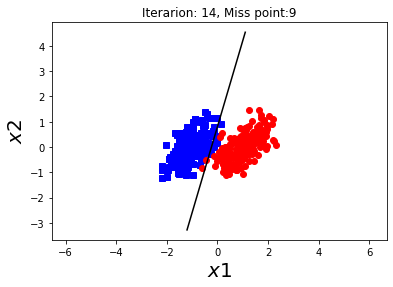

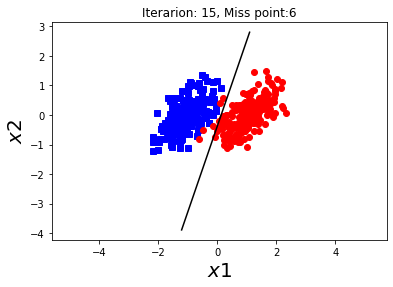

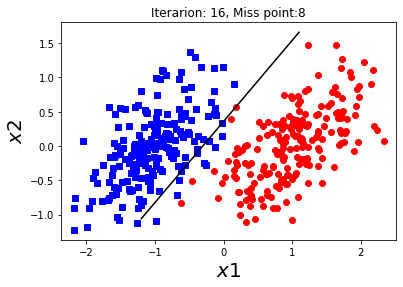

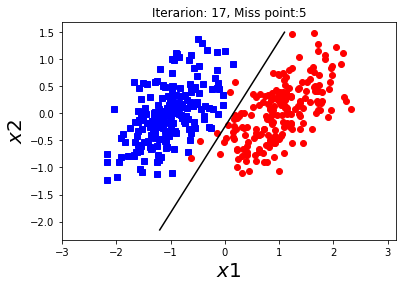

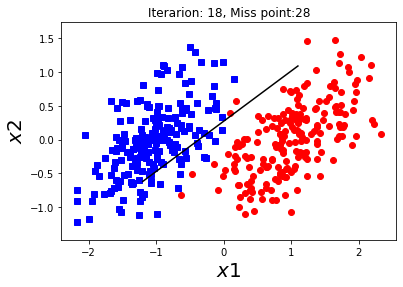

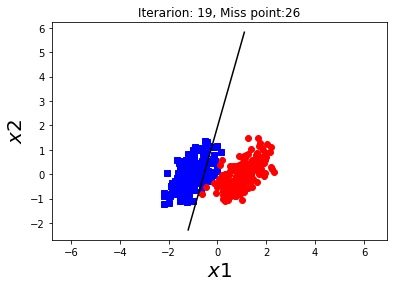

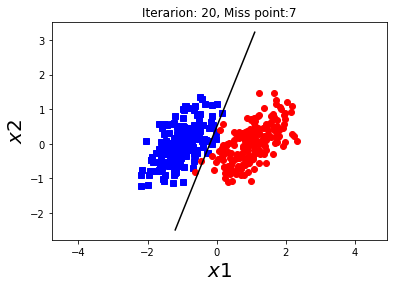

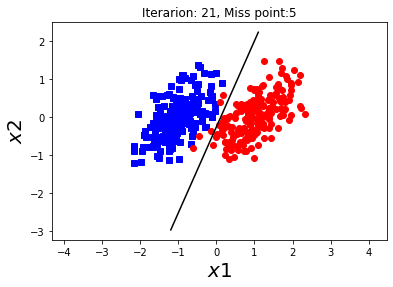

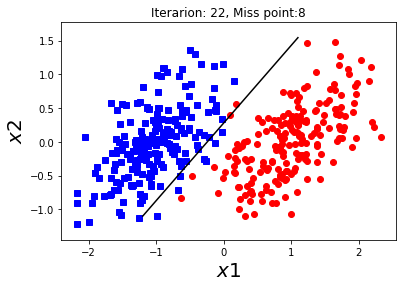

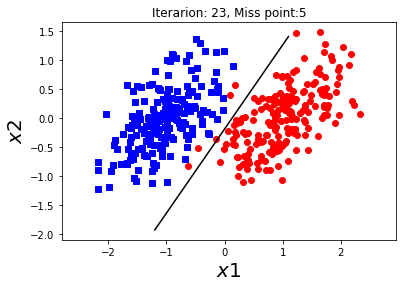

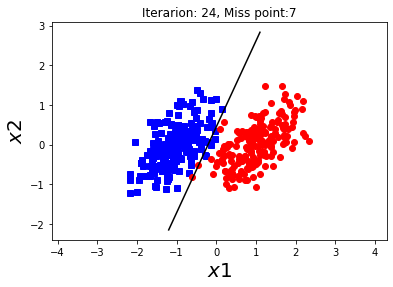

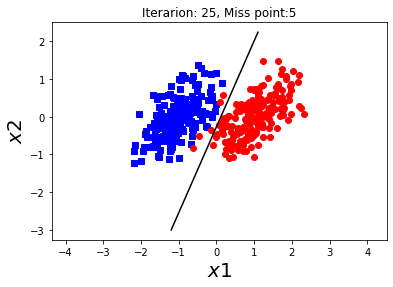

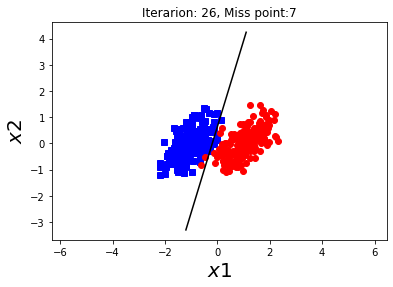

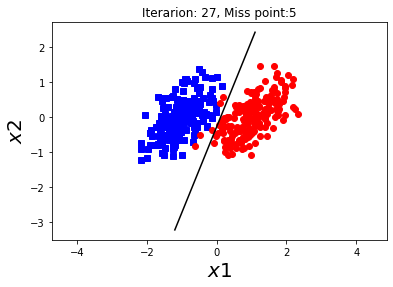

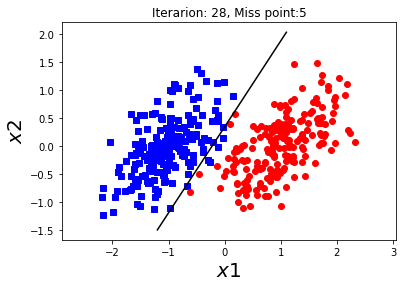

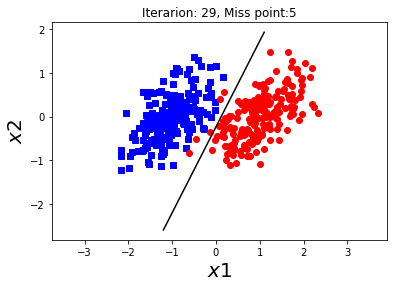

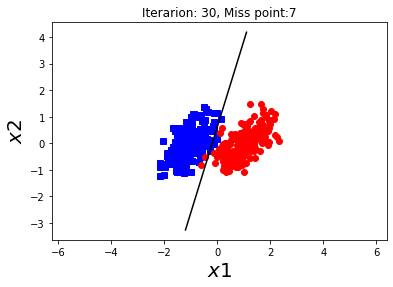

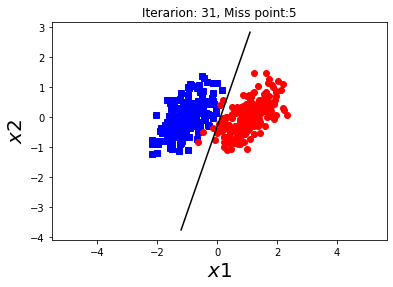

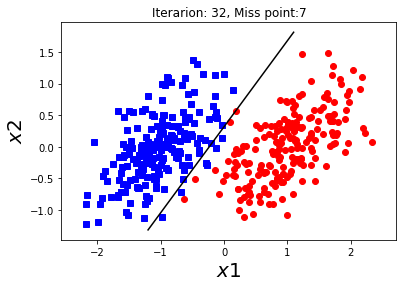

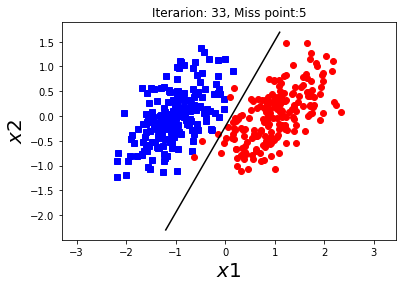

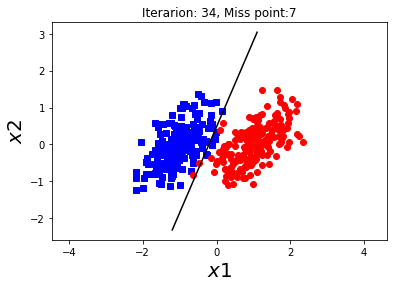

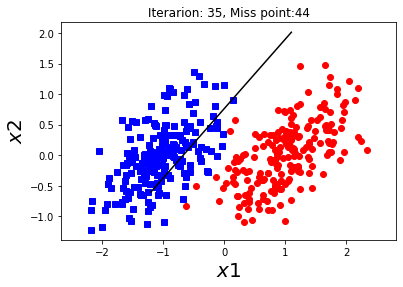

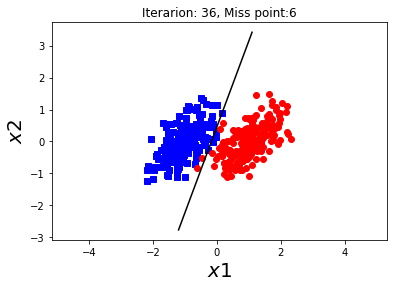

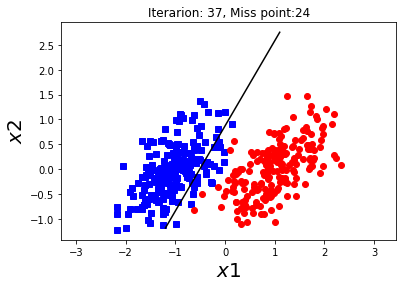

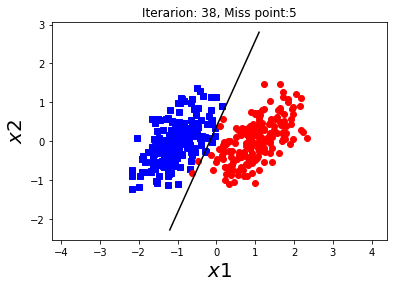

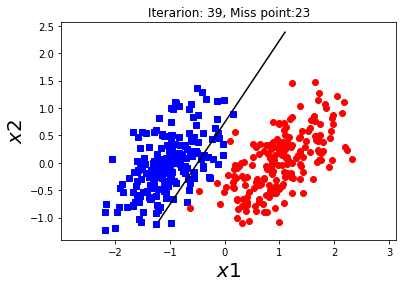

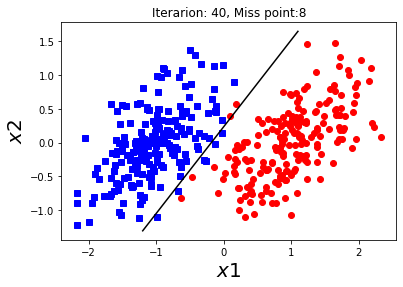

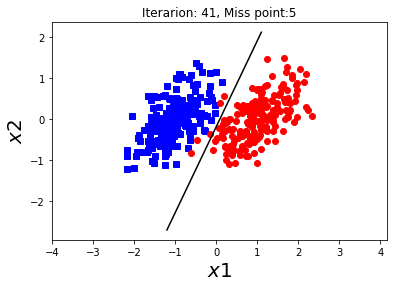

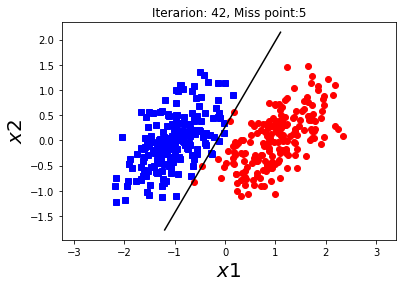

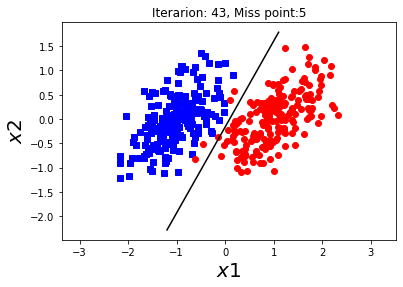

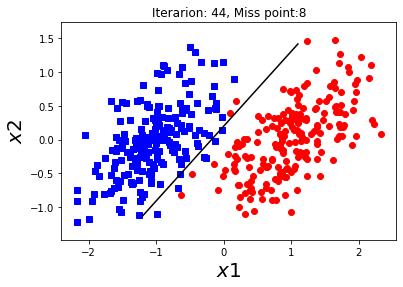

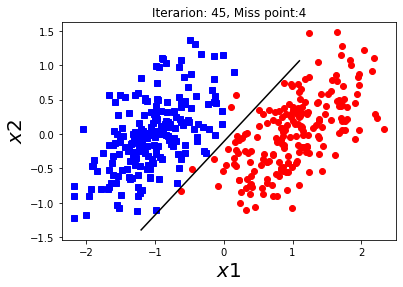

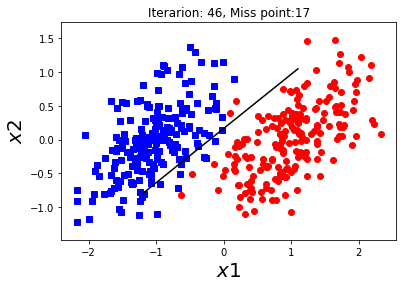

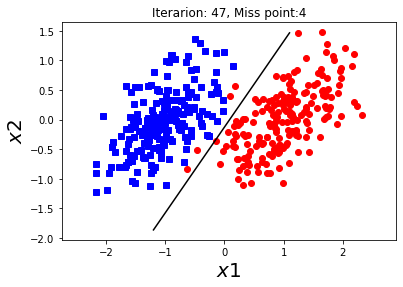

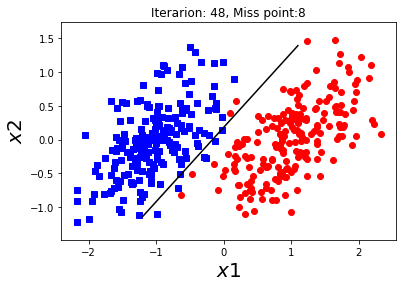

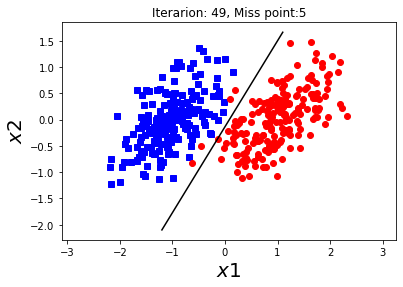

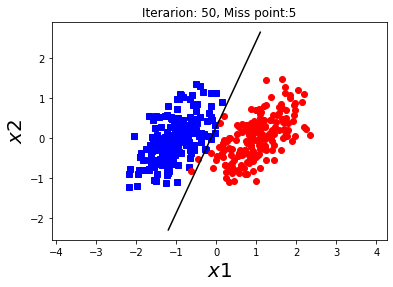

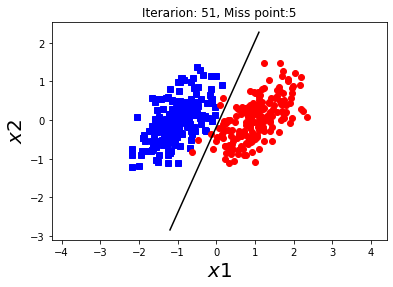

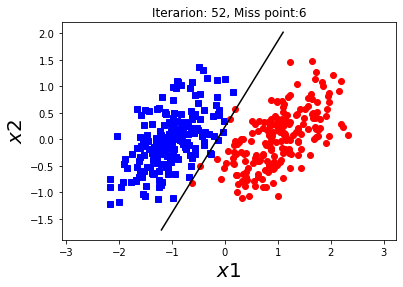

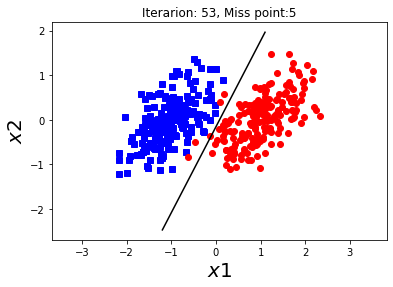

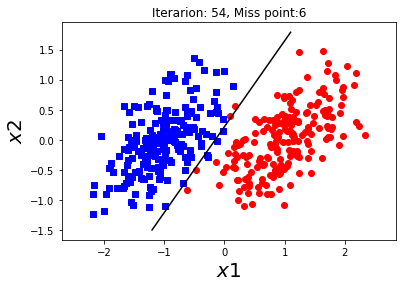

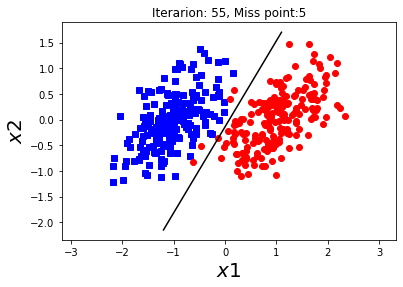

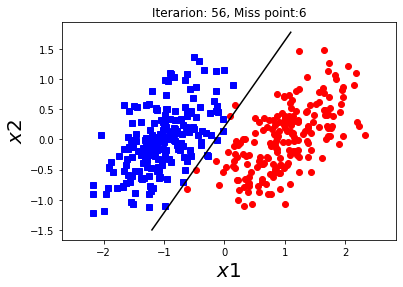

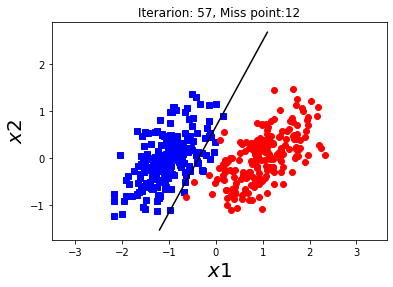

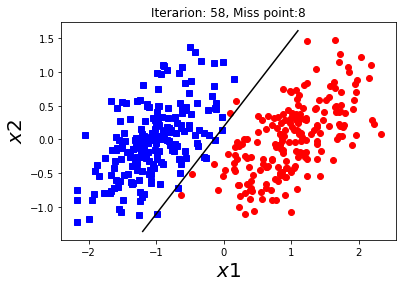

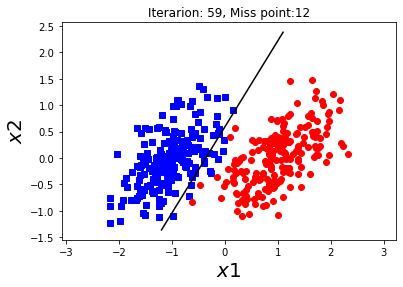

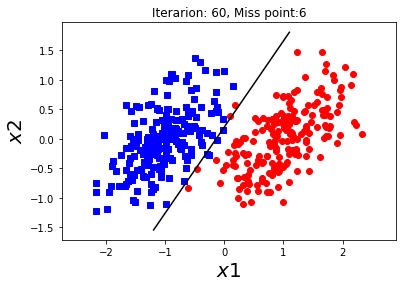

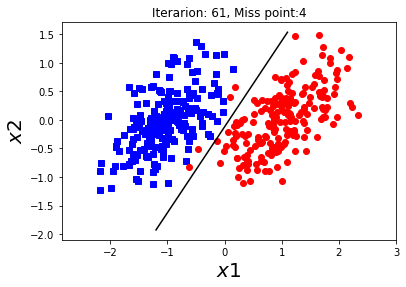

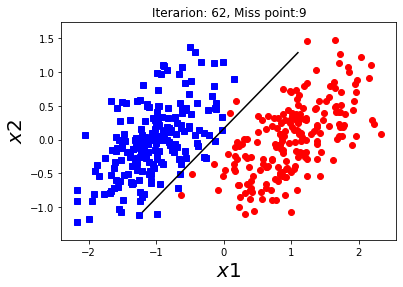

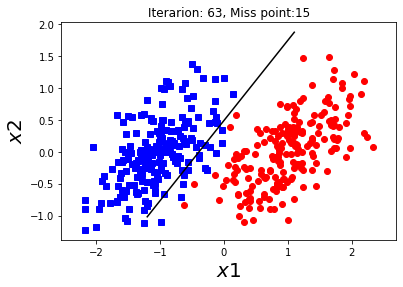

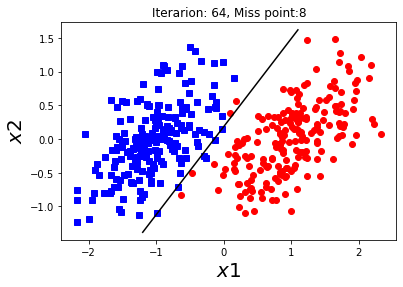

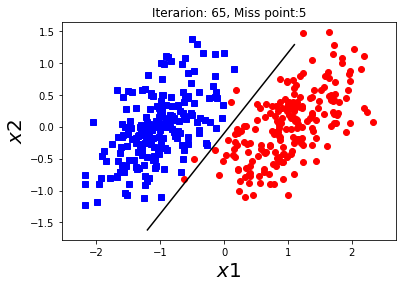

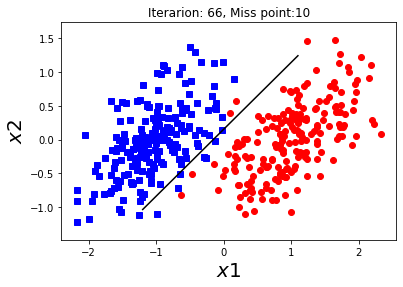

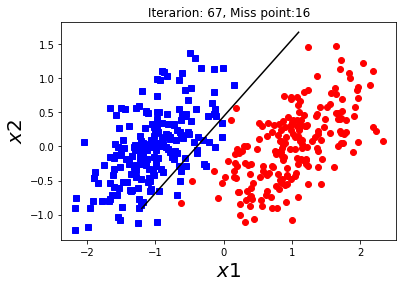

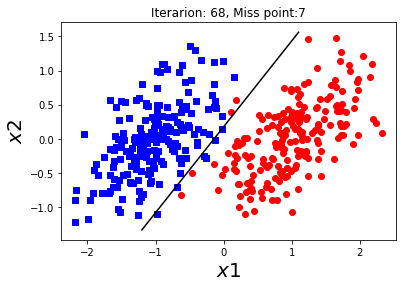

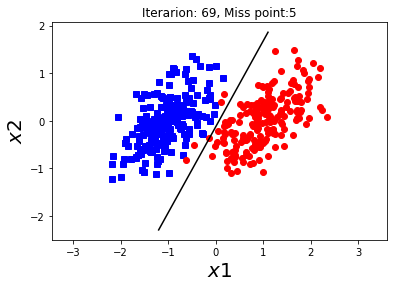

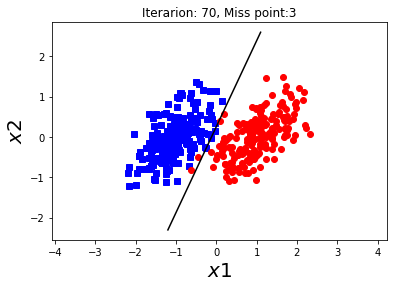

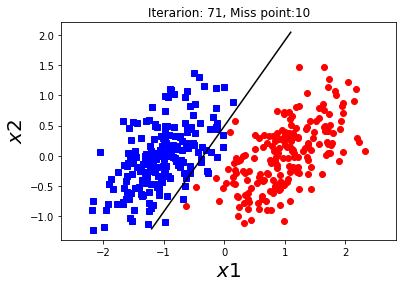

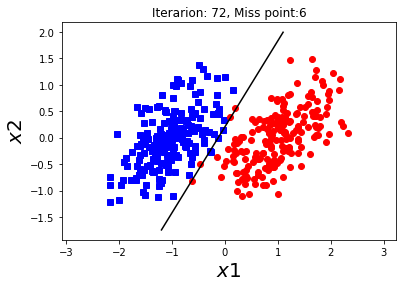

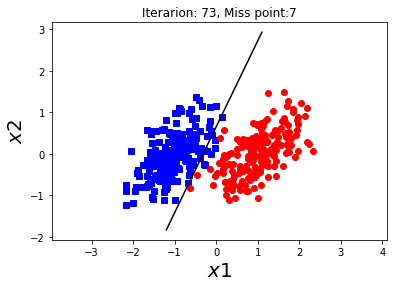

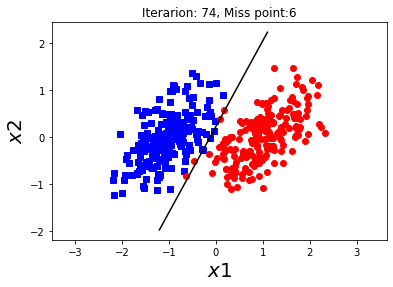

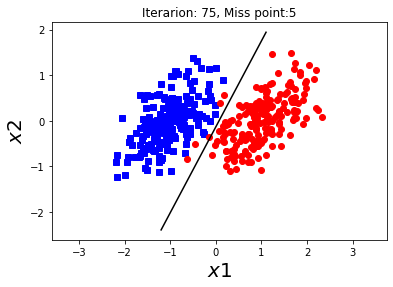

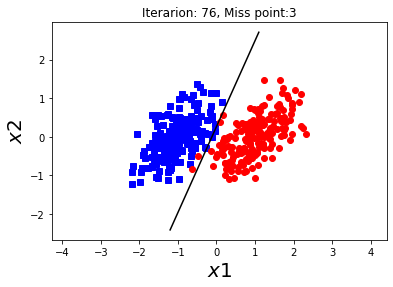

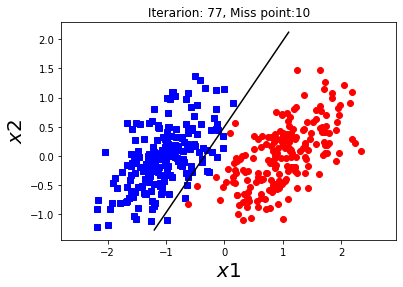

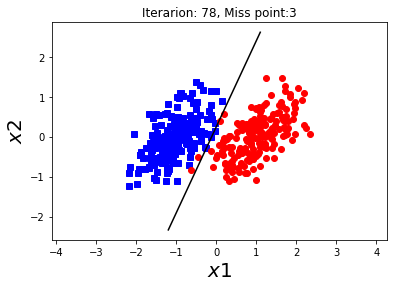

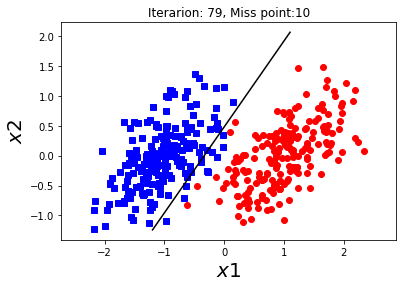

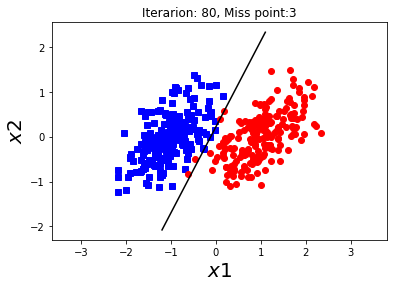

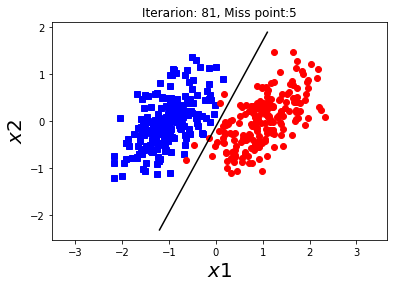

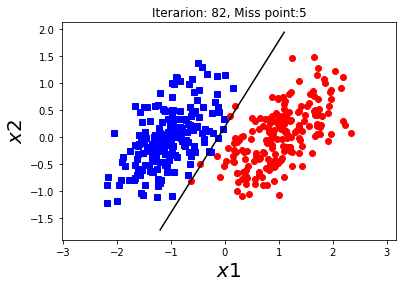

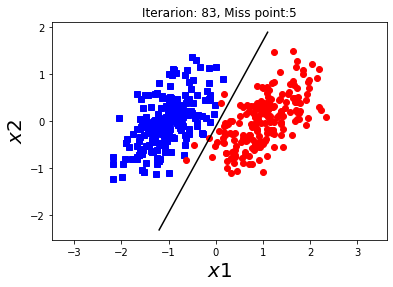

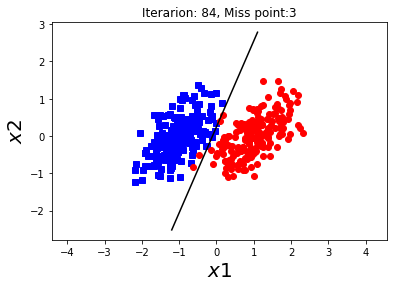

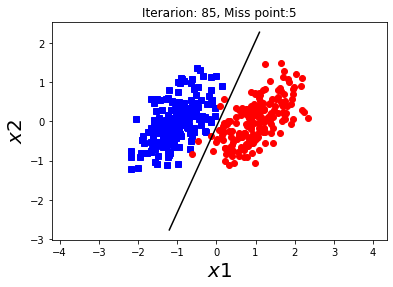

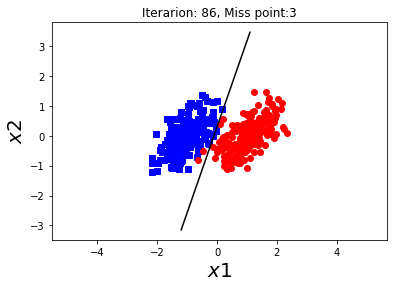

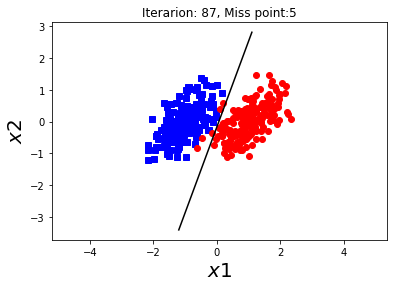

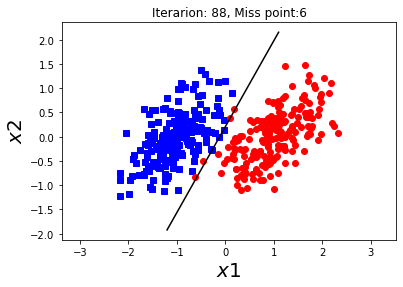

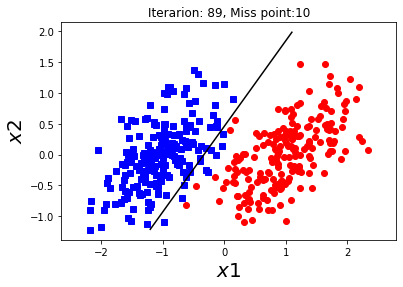

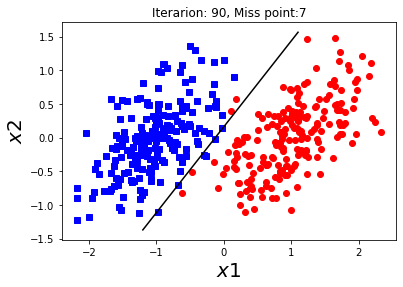

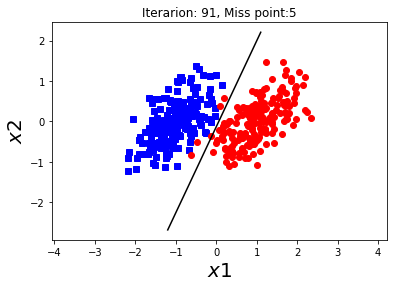

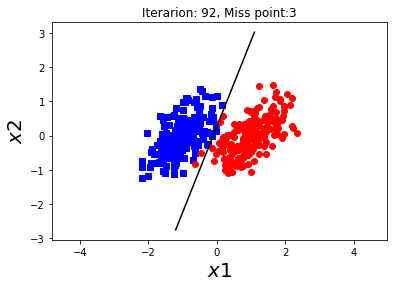

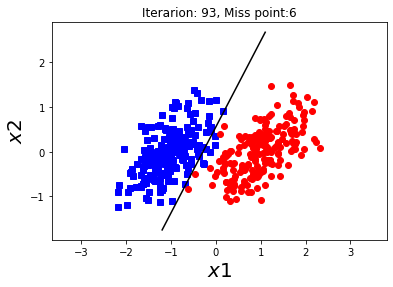

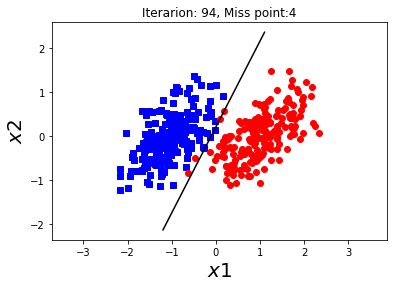

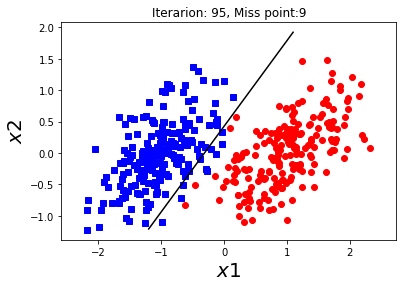

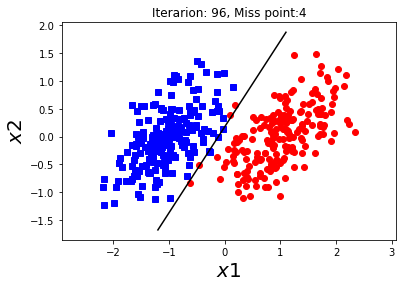

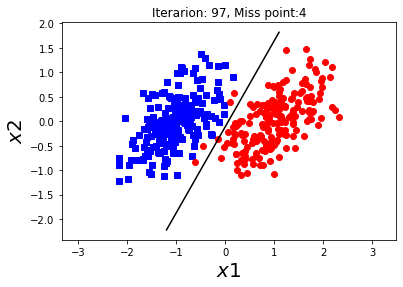

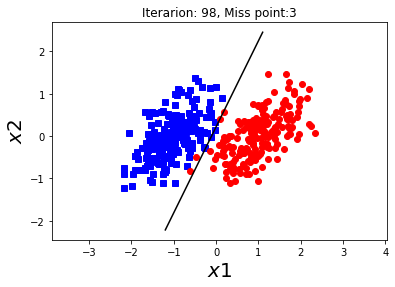

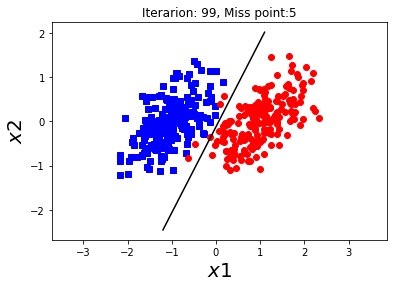

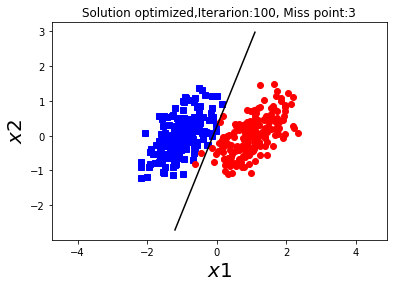

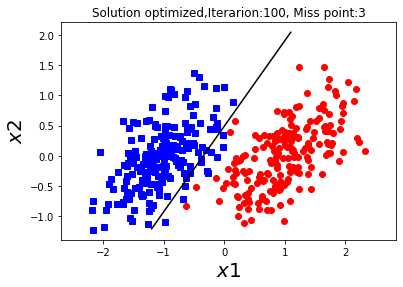

In [3]:
import numpy as np
from matplotlib import pyplot as plt
#lib for save graph into file pdf
from matplotlib.backends.backend_pdf import PdfPages

#generate data for algorithms
means = [[-1, 0], [1, 0]]
covariance_matrix = [[0.3, 0.2], [0.2, 0.3]]
n = 200
epoch = 100
x1 = np.random.multivariate_normal(means[0], covariance_matrix, n)
x2 = np.random.multivariate_normal(means[1], covariance_matrix, n)


def predict(w, X):
	return np.sign(X.dot(w))


def visualization(w, iteration,number_miss_classified):
	plt.plot(x1[:, 0], x1[:, 1], 'bs')  # blue square
	plt.plot(x2[:, 0], x2[:, 1], 'ro')  # red circle marker
	plt.axis('equal')
	plt.xlabel('$x1$', fontsize=20)
	plt.ylabel('$x2$', fontsize=20)
	
	str_it = 'Iterarion: {}, Miss point:{}'.format(iteration,number_miss_classified)
	if iteration==epoch:
		title='Solution optimized,Iterarion:{}, Miss point:{}'.format(iteration,number_miss_classified)
		plt.title(title)
	else:
		plt.title(str_it)

	#draw the normal vector for hyperplane
	x_temp = np.arange(-1.2, 1.2, 0.1)
	c, a, b = w[0], w[1], w[2]
	y = -a/b*x_temp-c/b
	plt.plot(x_temp, y, 'k')
	plt.show()
#using when the data is linearly separable


def pocket_algorithms(w_init, X, y):
	w = [w_init]
	iteration = 0
	w_result = list(w_init)
	min_number_miss_point=1e7
	number_miss_classified=0

	for i in range(epoch):
		iteration += 1
		if i==epoch:
			break
		pre = predict(w[-1], X)
		#find index for misclassified point
		mis_index = np.where(np.equal(pre, y) == False)[0]  # convert to array
		number_miss_classified = mis_index.shape[0]
		visualization(w[-1],iteration,number_miss_classified)
		if number_miss_classified == 0:
			return
		random_index = np.random.choice(mis_index, 1)[0]
		w.append(w[-1]+y[random_index]*X[random_index])
		if number_miss_classified < min_number_miss_point:
			min_number_miss_point = number_miss_classified
			w_result = w[-1]

	if len(np.where(np.equal(w_init,w_result)==False)[0])!=0:
		visualization(w_result,iteration,min_number_miss_point)
		

def perceptron_algorithms(w_init, X, y):
	w = [w_init]
	iteration = 0
	miss_point = []
	while True:
		if len(miss_point) > 0:
			visualization(w[-1], iteration)

		iteration += 1
		pre = predict(w[-1], X)
		#find index for misclassified point
		mis_index = np.where(np.equal(pre, y) == False)[0]  # convert to array
		number_misclassified = mis_index.shape[0]
		miss_point.append(mis_index)
		if number_misclassified == 0:
			break
		random_index = np.random.choice(mis_index, 1)[0]
		w.append(w[-1]+y[random_index]*X[random_index])


if __name__ == "__main__":
	#each row is data point
	X = np.concatenate((x1, x2), axis=0)
	#label for each domain,-1/1
	y = np.concatenate((np.ones(n), -1*np.ones(n)))
	#add 1 dimention into each data point (bias trick)
	Xbar = np.concatenate((np.ones((2*n, 1)), X), axis=1)
	#generate for w
	w_initial = np.random.randn(Xbar.shape[1])
	
	pocket_algorithms(w_initial,Xbar,y)
	#perceptron_algorithms(w_initial, Xbar,y)

	
